In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_squared_error
from statistics import mean
from typing import Dict, List, Tuple
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2024-03-22 04:46:41.546563: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 04:46:41.551042: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-22 04:46:41.615964: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-22 04:46:42.732568: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:

class Neural:
    
    def __init__(self, layers, epochs, learning_rate=0.001, batch_size=32, validation_split=0.2, verbose=1):
        self._layer_structure = layers
        self._batch_size = batch_size
        self._epochs = epochs
        self._learning_rate = learning_rate
        self._validation_split = validation_split
        self._verbose = verbose
        self._losses = {"train": [], "validation": []}
        self._is_fit = False
        self.__layers = None
        
    def fit(self, X, y):
        X, X_val, y, y_val = train_test_split(X, y, test_size=self._validation_split, random_state=42)
        self.__layers = self.__init_layers()
        for epoch in range(self._epochs):
            epoch_losses = []
            for i in range(1, len(self.__layers)):
                x_batch = X[i:(i+self._batch_size)]
                y_batch = y[i:(i+self._batch_size)]
                pred, hidden = self.__forward(x_batch)
                loss = self.__calculate_loss(y_batch, pred)
                epoch_losses.append(np.mean(loss ** 2))
                self.__backward(hidden, loss)
            valid_preds, _ = self.__forward(X_val)
            train_loss = np.mean(epoch_losses)
            valid_loss = np.mean(self.__calculate_mse(valid_preds, y_val))
            self._losses["train"].append(train_loss)
            self._losses["validation"].append(valid_loss)
            if self._verbose:
                print(f"Epoch: {epoch} Train MSE: {train_loss} Valid MSE: {valid_loss}")
        self._is_fit = True
    
    def predict(self, X):
        if not self._is_fit:
            raise Exception("Model has not been trained yet.")
        pred, _ = self.__forward(X)
        return pred
    
    def plot_learning(self):
        plt.plot(self._losses["train"], label="Perdida")
        plt.plot(self._losses["validation"], label="validacion")
        plt.legend()
    
    def __init_layers(self):
        layers = []
        for i in range(1, len(self._layer_structure)):
            layers.append([
                np.random.rand(self._layer_structure[i-1], self._layer_structure[i]) / 5 - .1,
                np.ones((1, self._layer_structure[i]))
            ])
        return layers
    
    def __forward(self, batch):
        hidden = [batch.copy()]
        for i in range(len(self.__layers)):
            batch = np.matmul(batch, self.__layers[i][0]) + self.__layers[i][1]
            if i < len(self.__layers) - 1:
                batch = np.maximum(batch, 0)
            hidden.append(batch.copy())
        return batch, hidden
    
    def __calculate_loss(self, actual, predicted):
        return predicted - actual
    
    def __calculate_mse(self, actual, predicted):
        return (actual - predicted) ** 2
    
    def __backward(self, hidden, grad):
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))
    
            w_grad = hidden[i].T @ grad
            b_grad = np.mean(grad, axis=0)
    
            self.__layers[i][0] -= w_grad * self._learning_rate
            self.__layers[i][1] -= b_grad * self._learning_rate
            
            grad = grad @ self.__layers[i][0].T



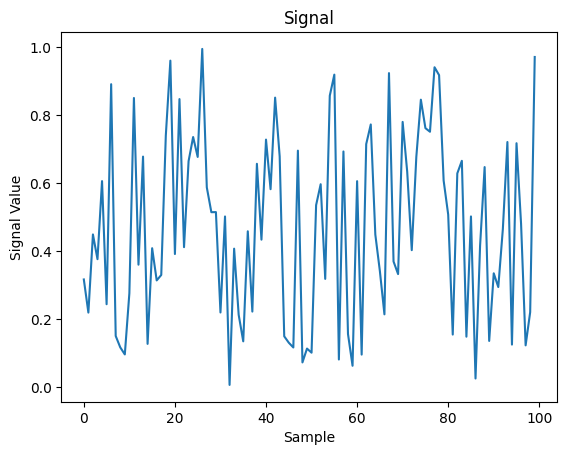

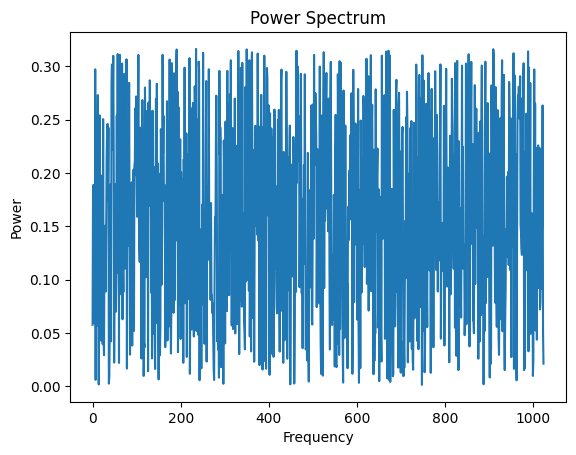

In [4]:
import numpy as np

# Define the number of training samples
num_samples = 100

# Reshape signal_values to (num_samples, 1)
signal_values = np.random.rand(num_samples).reshape(-1, 1)

# Now, you can multiply them
power_spectra = signal_values * np.random.rand(num_samples, 1025)

# Create the training data array
data = np.column_stack((signal_values, power_spectra))

import matplotlib.pyplot as plt

plt.plot(signal_values)
plt.xlabel('Sample')
plt.ylabel('Signal Value')
plt.title('Signal')
plt.show()


plt.plot(power_spectra[0])
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.show()


In [5]:
x = data[:, 1:]
y = data[:, 0]

print(x.shape, y.shape)

(100, 1025) (100,)


In [6]:
print (x)

[[0.05755808 0.17914636 0.18878255 ... 0.26327097 0.05066601 0.02108484]
 [0.0751888  0.15414967 0.08832604 ... 0.21531076 0.1282408  0.01215201]
 [0.06524481 0.3263592  0.23613387 ... 0.43622198 0.1547178  0.25141614]
 ...
 [0.07763651 0.04121288 0.00851419 ... 0.07341623 0.07991616 0.01548501]
 [0.12024553 0.1474231  0.01099219 ... 0.20731512 0.05433176 0.06389448]
 [0.52633754 0.88887737 0.72630073 ... 0.60996805 0.08683064 0.14056174]]


In [7]:
print(y)

[0.31640681 0.21888545 0.44883609 0.3760621  0.60578583 0.24350144
 0.89094259 0.15008661 0.11655203 0.09579122 0.27593297 0.85038157
 0.35987225 0.67791489 0.12682942 0.40834452 0.31358251 0.32960185
 0.73966023 0.96023354 0.39121819 0.84716215 0.41139967 0.66454015
 0.73556966 0.67694875 0.99475459 0.5874283  0.5142925  0.51462234
 0.21918266 0.50173934 0.00605374 0.40700982 0.2122505  0.13431357
 0.45814895 0.2218542  0.656729   0.43349605 0.72794346 0.58200105
 0.85143098 0.67851381 0.1490941  0.13029108 0.11622193 0.69544269
 0.07221666 0.112987   0.10091691 0.53512092 0.59658219 0.31806314
 0.85703404 0.91908565 0.08085778 0.69302051 0.15585792 0.06241118
 0.605639   0.09529681 0.71472979 0.77246617 0.44854201 0.34099588
 0.21375008 0.92359589 0.36930155 0.33216755 0.77997487 0.63338045
 0.40255749 0.67669729 0.84539597 0.76162331 0.7510091  0.94080789
 0.91761977 0.60730591 0.50720669 0.15423459 0.62851374 0.6654997
 0.14799802 0.50185919 0.02494756 0.41530173 0.64710416 0.13549

In [8]:
x = np.random.rand(num_samples)
y = np.random.rand(num_samples)

def generate_data():
    corr_a = 0.1
    corr_b= 0.2

    a =  x
    b = y

    target = corr_a * a + corr_b * b + np.random.normal(0, 0.1, size=num_samples)
    df = pd.DataFrame({'a': a, 'b': b, 'target': target})
    return df


print(x)

print(y)

[0.43749252 0.53927563 0.67718811 0.7128669  0.58447493 0.56469131
 0.26326089 0.52539108 0.60249324 0.69681334 0.71738594 0.87729455
 0.75089423 0.14651709 0.86060756 0.35019003 0.73197968 0.51136567
 0.29992136 0.44057354 0.15101909 0.78901917 0.84718542 0.41067635
 0.82011204 0.77017911 0.34231849 0.91762216 0.83519784 0.31011079
 0.25388725 0.06126151 0.65482626 0.95625097 0.37295183 0.89455486
 0.37991751 0.90718499 0.4131693  0.88541266 0.18153258 0.42586179
 0.98739758 0.29007075 0.71347966 0.16359339 0.35821331 0.42987905
 0.14373232 0.25700675 0.39625517 0.8961209  0.45926091 0.50047015
 0.42031934 0.76959505 0.87001974 0.96071425 0.78384193 0.92681362
 0.18768179 0.22681873 0.5314537  0.22512692 0.17757897 0.61358401
 0.95624167 0.24125126 0.1011654  0.65166352 0.72571002 0.40725614
 0.76293188 0.89425616 0.58990029 0.39513459 0.08633067 0.2264042
 0.34628038 0.82439262 0.31754558 0.6931309  0.33213567 0.50017626
 0.245434   0.08293717 0.65477305 0.73504127 0.47379737 0.21811

Epoch: 0 Train MSE: 0.5594948355017046 Valid MSE: 0.49502823279045594
Epoch: 1 Train MSE: 0.5455808778421799 Valid MSE: 0.4822508556624465
Epoch: 2 Train MSE: 0.5320170845630836 Valid MSE: 0.4698061645788458
Epoch: 3 Train MSE: 0.5187944140408258 Valid MSE: 0.4576854637349167
Epoch: 4 Train MSE: 0.505904088576558 Valid MSE: 0.4458803102036069
Epoch: 5 Train MSE: 0.4933375846040188 Valid MSE: 0.4343825046552602
Epoch: 6 Train MSE: 0.48108662336219843 Valid MSE: 0.4231840825147735
Epoch: 7 Train MSE: 0.4691431620071931 Valid MSE: 0.4122773055321428
Epoch: 8 Train MSE: 0.45749938513916066 Valid MSE: 0.4016546537437806
Epoch: 9 Train MSE: 0.4461476967217284 Valid MSE: 0.3913088178033364
Epoch: 10 Train MSE: 0.4350807123725441 Valid MSE: 0.38123269166201135
Epoch: 11 Train MSE: 0.4242912520049277 Valid MSE: 0.3714193655795325
Epoch: 12 Train MSE: 0.4137723328017482 Valid MSE: 0.36186211944806496
Epoch: 13 Train MSE: 0.403517162503766 Valid MSE: 0.3525544164123679
Epoch: 14 Train MSE: 0.3935

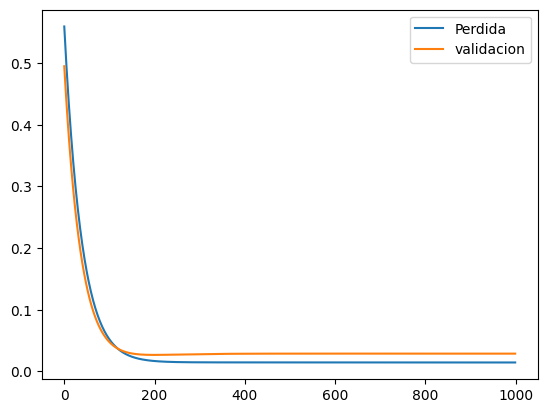

In [9]:
from sklearn.preprocessing import StandardScaler
df = generate_data()
x = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
x = scaler.fit_transform(x)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)


layers_structure =[X_train.shape[1], 10, 10,1]
nn = Neural(layers_structure, 1000, 1e-5, 64, 0.2, 1)


nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
nn.plot_learning()

print("Error de test: ", mean_squared_error(y_test, y_pred))





